## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('../data/ab_test/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Get dataset info and number of unique value each variable
print(df.info())
print('\r')
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64


In [4]:
# Get unique values each categorical variable
categorical_vars = ['group','landing_page','converted']
for var in categorical_vars:
    print('{:>12} : {}'.format(var,df[var].unique()))

       group : ['control' 'treatment']
landing_page : ['old_page' 'new_page']
   converted : [0 1]


In [5]:
# Convert datatype timestamp from string to datetime
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

b. Use the below cell to find the number of rows in the dataset.

In [6]:
num_observation = df.shape[0]
print(num_observation)

294478


c. The number of unique users in the dataset.

In [7]:
num_unq_user = df['user_id'].nunique()
print(num_unq_user)

290584


d. The proportion of users converted.

In [8]:
num_unq_user_convert = df[df['converted']==1]['user_id'].nunique()
convert_rate = num_unq_user_convert/num_unq_user
convert_rate

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
num_treat_oldpage = df.query('group=="treatment" & landing_page!="new_page" | group=="control" & landing_page!="old_page"')\
                    .shape[0]
num_treat_oldpage

3893

In [10]:
df.groupby(['group','landing_page'], as_index=False)[['timestamp']].count()

,group,landing_page,timestamp
0,control,new_page,1928
1,control,old_page,145274
2,treatment,new_page,145311
3,treatment,old_page,1965


f. Do any of the rows have missing values?

In [11]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df.query('group=="treatment" & landing_page=="new_page" | group=="control" & landing_page=="old_page"').copy()
print(df2.shape)
df2.head()

(290585, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
num_unq_user = df2['user_id'].nunique()
print(num_unq_user)

290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2['user_id'].value_counts().sort_values(ascending=False)

773192    2
639032    1
663620    1
778364    1
645179    1
         ..
661437    1
649155    1
704424    1
706471    1
813043    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop([2893], axis=0)
print(df2.shape)
df2.head()

(290584, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
cvr = (df2['converted']==1).sum()/df2.shape[0]
cvr

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
control_cvr = df2.query('converted==1 & group=="control"').shape[0] \
                        / df2.query('group=="control"').shape[0]
control_cvr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treat_cvr = df2.query('converted==1 & group=="treatment"').shape[0] \
                        / df2.query('group=="treatment"').shape[0]
treat_cvr

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
treat_rate = df2.query('landing_page=="new_page"').shape[0] / df2.shape[0]
treat_rate

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<div style="background-color: #EFEFEF; padding: 10px">
    <p>There is no sufficient evidence to say that the new treatment page leads to more conversion. </p>
<ul>
    <li>The probability of converting an user who received the control page is 0.1204.
    <li>The probability of converting an user who received the treatment page is 0.1188.
    <li>The probability of an user receiving the treatment page is 0.5. It means the probability of an user receiving the treatment page seems to be almost equal to the probability of an user receiving the control page.
</div>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<div style="background-color: #EFEFEF; padding: 10px">
<p>I set up the null and alternative hypotheses in the following way:</p>
<p>
    $H_{0}$: $p_{new}$ &lt;= $p_{old}$<br/>
    <div style="color: gray">(New page design has a conversion rate that is lower or equal to old page design)</div>
</p>
<p>
    $H_{1}$: $p_{new}$ &gt; $p_{old}$<br/>
    <div style="color: gray">(New page design has a higher conversion rate than old page design)</div>
</p>
<p>
    where $p_{old}$ is the conversion rate of the old page design, and  $p_{new}$ is the conversion rate of the new page design.
</p>
</div>


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# p_new and p_old have same mean because we are in the world where our new page design has zero effect
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [23]:
# p_new and p_old have same mean because we are in the world where our new page design has zero effect
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
treat_group = df2.query('group=="treatment"')
n_new = treat_group.shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
control_group = df2.query('group=="control"')
n_old = control_group.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.000707019241683704

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
    old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
p_diffs = np.array(p_diffs)
p_diffs.min(), p_diffs.max()

(-0.00436566339141814, 0.004630061314173969)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
# Sample statistics: actual observed difference
control_group_cvr = control_group['converted'].mean()
treat_group_cvr = treat_group['converted'].mean()
diff = treat_group_cvr - control_group_cvr
diff

-0.0015782389853555567

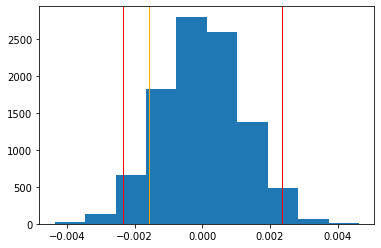

In [31]:
# 95% confidence interval
lower, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
plt.hist(p_diffs);
plt.axvline(x=lower, color='red', linewidth=1);
plt.axvline(x=upper, color='red', linewidth=1);
plt.axvline(x=diff, color='orange', linewidth=1);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# p-value
(p_diffs > diff).mean()

0.9081

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<div style="background-color: #EFEFEF; padding: 10px">
The p-value in this A/B test result is 0.9081, while the alpha is 0.05. The p-value is larger than 0.05 and it means we can't conclude that a significant difference exists. Therefore, we fail to reject the null hypothesis.
</div>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

n_old_convert = control_group.query("converted==1").shape[0]
n_new_convert = treat_group.query("converted==1").shape[0]
n_old = control_group.shape[0]
n_new = treat_group.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([n_old_convert, n_new_convert], 
                                              [n_old, n_new], 
                                              value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<div style="background-color: #EFEFEF; padding: 10px">
<p>The z-value is a statistical measurement of a score's relationship to the mean in a group of scores. In this case, the z-value is 1.31 which doesn't higher than the <a href='https://www.dummies.com/education/math/statistics/checking-out-statistical-confidence-interval-critical-values/'>critical value</a> at 95% confidence, which is 1.96. Therefore, we fail to reject the null hypothesis.</p>
<p>The p-value is 0.905, larger than 0.05, so we also fail to reject the null hypothesis using the p-value.</p>
<p>The conclusion is the same as the findings in parts j. and k. We fail to reject the null hypothesis. There is no significant difference between the old and new pages.
</div>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<div style="background-color: #EFEFEF; padding: 10px">
    We should perform <b>logistic regression</b> in this case.
</div>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept'] = 1
df2[['old_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('old_page', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
# logistic model
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
logit_results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:03:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<div style="background-color: #EFEFEF; padding: 10px">
<p>The p-value associated with ab_page is 0.190 (higher than 0.05), which means we fail to reject the null hypothesis.
</p>
<p>The result in Part II and Part III is differs because they perform different things. In Part II, the null and alternative hypotheses in the following way:</p>
<ul>
    <li>$H_{0}$: $p_{new}$ &lt;= $p_{old}$</li>
    <li>$H_{1}$: $p_{new}$ &gt; $p_{old}$</li>
</ul>
<p>In Part III, the null and alternative hypotheses in the following way:</p>
<ul>
    <li>$H_{0}$: $p_{new}$ = $p_{old}$</li>
    <li>$H_{1}$: $p_{new}$ != $p_{old}$</li>
</ul>
</div>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<div style="background-color: #EFEFEF; padding: 10px">
<p>
The advantages of considering other factors is the ability to determine the relative influence of one or more predictor variables to the criterion value. For instance, the user gender who converted, the location/country/city, etc. The other advantage is the ability to identify anomalies. 
</p>
<p>
The disadvantage of considering other factor is overfitting model as a result of sampling bias. 
</p>
</div>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('../data/ab_test/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [39]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
df_country = pd.get_dummies(df_new['country'])
df_new = df_new.join(df_country)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [41]:
df_new.drop(['country','US'], axis=1, inplace=True)
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [42]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','CA','UK']])
logit_results = logit_mod.fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        21:03:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

<div style="background-color: #EFEFEF; padding: 10px">Country doesn't have significant effect on conversion rate. The p-value is higher than 0.05 which means that there is no significance difference in predicting the conversion of users.</div>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page']])
logit_results = logit_mod.fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        21:03:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

<div style="background-color: #EFEFEF; padding: 10px">All of the p-values related to country or page are higher than 0.05. I conclude that none of these factors are particularly good predictors of conversion.</div>

<a id='conclusions'></a>
## Conclusions
<p>The new page design is not statistically significant increase conversion. In Part II, we found p-value>0.05 which indicates strong evidence for the null hypothesis.</p>
<p>In Part III, we used the logistic regression model to calculate the p-value. The results also fail to reject the null hypothesis. When we use another factor into the regression model, we also faund that country doesn't have significant effect on conversion rate.</p>

<a id='references'></a>
## References
- <a href='https://sciencing.com/advantages-disadvantages-multiple-regression-model-12070171.html'>Advantage Disadvantage Multiple Regression Model</a>, Sciencing.
- <a href='https://www.theclassroom.com/disadvantages-logistic-regression-8574447.html'>Disadvantage Regression</a>, The Class Room.